# Projeto Airbnb

Neste Notebook serão analisados dados do Airbnb. 

Para mais informações sobre os dados, acesse o repositório no GitHub.

Bruna Mendes

Última alteração: 18/01/2021


### i. Bibliotecas

In [1]:
# importa pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ii. Dados

In [2]:
#Importando as bases de dados
# informa o caminho dos arquivos

price = 'desafio_priceav.csv'

details = 'desafio_details.csv'

In [3]:
#Carrega os dados

dataset_price = pd.read_csv(price)

dataset_details = pd.read_csv(details)

### iii. Análise Exploratória

In [4]:
# Verifica as primeiras linhas dos dataframes

dataset_price.head()


,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


In [5]:
dataset_details.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [6]:
# Mostra informações da base details

print(dataset_details.shape)
print(dataset_details.dtypes)

(4691, 9)
Unnamed: 0               int64
airbnb_listing_id        int64
suburb                  object
ad_name                 object
number_of_bedrooms     float64
number_of_bathrooms    float64
star_rating            float64
is_superhost              bool
number_of_reviews      float64
dtype: object


Serão utilizadas duas bases, a details, que está a nível do imóvel(anúncio) e traz características do imóvel como 
bairro, número de banheiros e quartos, nome do anúncio, avaliação em estrelas, superhost e número de
avaliações. A segunda base, price, está a nível do imóvel e da data de ocupação e traz informações como data, data 
da reserva, preço da diária e ocupação. 

In [7]:
# Checa se a base possui valores faltantes

dataset_details.isnull().sum() # 4 das 8 colunas possuem valores faltantes

Unnamed: 0                0
airbnb_listing_id         0
suburb                    0
ad_name                   0
number_of_bedrooms      183
number_of_bathrooms       1
star_rating            2121
is_superhost              0
number_of_reviews         7
dtype: int64

In [8]:
dataset_price.isnull().sum() # não há valores faltantes



Unnamed: 0           0
Unnamed: 0.1         0
airbnb_listing_id    0
booked_on            0
date                 0
price_string         0
occupied             0
dtype: int64

A coluna star_rating contém 45,21% de dados faltantes aproximadamente. Já as colunas number_of_bedrooms, number_of_reviews e number_of_bathrooms contém aproximadamente, 3,9%, 0,15% e 0,02% respectivamente. A avaliação do imóvel não é obrigatória, inclusive pode representar indiretamente uma avaliação mediana por parte do hóspede, que se sente mais incentivado a fazê-la nos casos extremos.


In [9]:
dataset_details.describe()

,Unnamed: 0,airbnb_listing_id,number_of_bedrooms,number_of_bathrooms,star_rating,number_of_reviews
count,4691.000000,4.691000e+03,4508.000000,4690.000000,2570.000000,4684.000000
mean,2345.000000,2.942420e+07,1.799911,1.518550,4.832296,9.972246
std,1354.319386,1.107263e+07,0.756529,0.655193,0.438165,18.406184
min,0.000000,1.086580e+05,1.000000,0.000000,0.000000,0.000000
25%,1172.500000,2.169509e+07,1.000000,1.000000,4.500000,1.000000
50%,2345.000000,3.089043e+07,2.000000,1.000000,5.000000,3.000000
75%,3517.500000,3.991763e+07,2.000000,2.000000,5.000000,11.000000
max,4690.000000,4.560414e+07,10.000000,8.000000,5.000000,232.000000


In [10]:
# ordenar em ordem decrescente as variáveis por seus valores faltantes

(dataset_details.isnull().sum() / len(dataset_details)).sort_values(ascending=False) * 100

star_rating            45.214240
number_of_bedrooms      3.901087
number_of_reviews       0.149222
number_of_bathrooms     0.021317
is_superhost            0.000000
ad_name                 0.000000
suburb                  0.000000
airbnb_listing_id       0.000000
Unnamed: 0              0.000000
dtype: float64

In [11]:
# contagem de valores distintos ordenados por ordem decrescente

dataset_details.nunique().sort_values(ascending=False)

#não há linhas repetidas

airbnb_listing_id      4691
Unnamed: 0             4691
ad_name                4595
number_of_reviews       123
number_of_bathrooms       8
number_of_bedrooms        7
star_rating               6
suburb                    5
is_superhost              2
dtype: int64

In [12]:
dataset_price.nunique().sort_values(ascending=False)

Unnamed: 0.1         283003
Unnamed: 0            76228
airbnb_listing_id      3347
price_string            893
booked_on               234
date                    149
occupied                  2
dtype: int64

### 1. Ordenando os bairros por ordem crescente do número de listings

Para esse exercício será utilizada a base details. Agruparemos a base por bairro e contaremos o número de anúncios

In [13]:
# group by bairros

bairros = dataset_details.groupby('suburb').count()

# descarta as colunas não utilizadas

to_drop = ['Unnamed: 0','ad_name', 
           'number_of_bedrooms', 'number_of_bathrooms', 
           'star_rating', 'is_superhost', 'number_of_reviews']

bairros.drop(to_drop, inplace=True, axis=1)

resultado = bairros.sort_values(by=['airbnb_listing_id'], ascending=False)

Um gráfico de barras será construído para visualizar o resultado

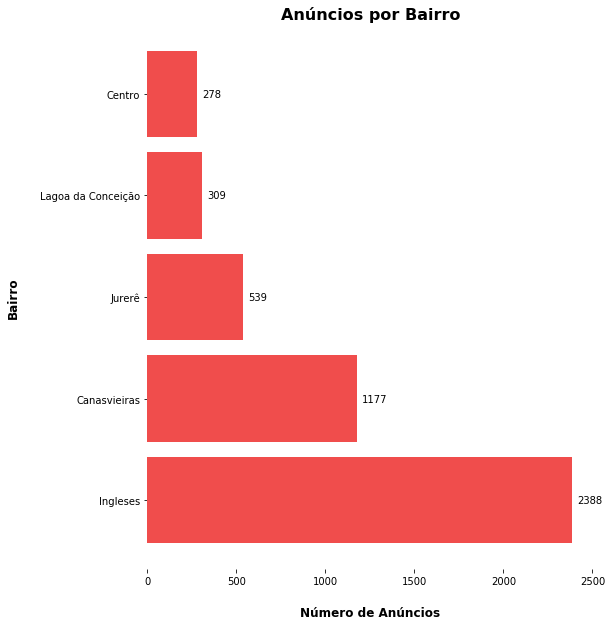

In [14]:
# gráfico dos anúncios por bairro


ax = resultado.plot(kind='barh', figsize=(8, 10), 
                 color='#f04d4c', zorder=2, width=0.85)

plt.gca().get_legend().remove()

# Retira as margens
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Título do eixo x
ax.set_xlabel("Número de Anúncios", labelpad=20, weight='bold', size=12)

# Título do eixo y
ax.set_ylabel("Bairro", labelpad=20, weight='bold', size=12)

#Título do gráfico
ax.set_title("Anúncios por Bairro", weight='bold', size=16)

rects = ax.patches

# Adiciona label em cada barra do gráfico

for rect in rects:
    # extrai a posição do x e do y do rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Número de pontos entre a barra e o label.
    space = 5
    # Alinhamento vertical para valores positivos
    ha = 'left'

    # Caso o valor seja negativo, posicionar à esquerda
    if x_value < 0:
        # Inverte o posicionamento
        space *= -1
        # Alinha à direta horizontalmente
        ha = 'right'

    # Usa o valor de X como  label e formata o número com uma casa decimal
    label = "{:.0f}".format(x_value)

    # Cria o label
    plt.annotate(
        label,                      # Usa `label` como label
        (x_value, y_value),         # Posiciona no fim da barra
        xytext=(space, 0),          # desloca horizontalmente
        textcoords="offset points", # Interpreta `xytext` como deslocamento em pontos
        va='center',                # Centraliza verticalmente o label
        ha=ha)                      # Alinha horizontalmente de forma diferente valores 
                                    # positivos e negativos.

plt.savefig("image.png")


O bairro com maior número de anúncios é o bairro dos Ingleses, com um total de 2388. O Centro possui o menor número de anúncios entre os cinco bairros abrangidos pela base, 278.

### 2. Ordenando os bairros em ordem crescente de faturamento médio dos listings

Para esse exercício serão utilizadas as duas bases. Primeiramente a price para criar a variável
faturamento e depois uma união das duas bases para analisar o faturamento médio dos imóveis por 
bairro.

In [15]:
# Mostra informações do dataset

print(dataset_price.shape)
print(dataset_price.dtypes)

(354520, 7)
Unnamed: 0             int64
Unnamed: 0.1           int64
airbnb_listing_id      int64
booked_on             object
date                  object
price_string         float64
occupied               int64
dtype: object


In [16]:
#Cria a variável faturamento (repete o preço da diária caso o imóvel esteja ocupado)

dataset_price['faturamento'] = np.where(dataset_price['occupied'] == 1, dataset_price['price_string'], 0)

dataset_price.head(15)

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,faturamento
0,0,2148,40201349,blank,2020-11-15,250.0,0,0.0
1,1,2159,40201349,blank,2020-11-26,250.0,0,0.0
2,2,2160,40201349,blank,2020-11-27,250.0,0,0.0
3,3,2173,40201349,blank,2020-12-10,250.0,0,0.0
4,4,2226,40201349,blank,2021-02-01,250.0,0,0.0
5,5,2230,40201349,blank,2021-02-05,250.0,0,0.0
6,6,2236,40201349,blank,2021-02-11,250.0,0,0.0
7,7,2245,40201349,blank,2021-02-17,250.0,0,0.0
8,8,2246,40201349,blank,2021-02-18,250.0,0,0.0
9,9,2256,40201349,blank,2021-02-28,250.0,0,0.0


In [17]:
#Calcula faturamento por imóvel

faturamento = dataset_price

to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'booked_on', 'date', 'price_string', 'occupied' ]

faturamento.drop(to_drop, inplace=True, axis=1)

fat_id = faturamento.groupby('airbnb_listing_id').sum() #soma os valores por imóvel

fat = pd.DataFrame(fat_id) #Transforma de tuple para Dataframe

fat.head()

,faturamento
airbnb_listing_id,
108658,22300.0
128631,28000.0
279586,3190.0
317970,6224.0
333619,24152.0


In [18]:
# Combina os datasets price e detail pelo identificador do imóvel

airbnb = pd.merge(dataset_details, fat, on='airbnb_listing_id')

airbnb.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,faturamento
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,6400.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0,8640.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0,8078.0
3,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0,15195.0
4,5,31301214,Ingleses,Apartamento beira mar com piscina nos Ingleses,2.0,2.0,5.0,True,62.0,6460.0


In [19]:
#Calcula faturamento médio por bairro

#Elimina as colunas desnecessárias

to_drop = ['Unnamed: 0', 'airbnb_listing_id',
           'ad_name', 'number_of_bedrooms', 
           'number_of_bathrooms', 
           'star_rating', 'is_superhost',
          'number_of_reviews']

airbnb.drop(to_drop, inplace=True, axis=1)

# Agrupa por bairro calculando o faturamento médio dos imóveis

newdf =  airbnb.groupby('suburb').mean()

newdf.head()


,faturamento
suburb,
Canasvieiras,12567.183529
Centro,8077.284264
Ingleses,14189.266082
Jurerê,20798.404826
Lagoa da Conceição,9954.451613


In [20]:
# Classifica em ordem decrescente

resultado2 = newdf.sort_values(by=['faturamento'], ascending=False) #ordem decrescente

resultado2

,faturamento
suburb,
Jurerê,20798.404826
Ingleses,14189.266082
Canasvieiras,12567.183529
Lagoa da Conceição,9954.451613
Centro,8077.284264


Constrói um gráfico de barras horizontais para visualizar o resultado.

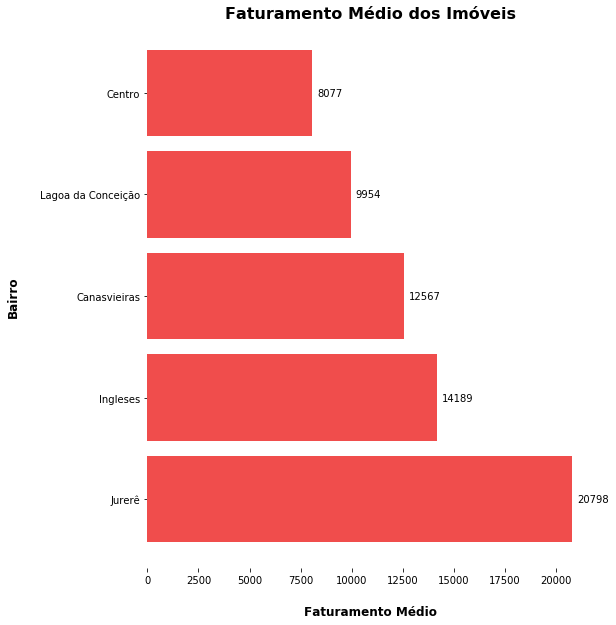

In [21]:
# gráfico doe faturamento médio por bairro

ax = resultado2.plot(kind='barh', figsize=(8, 10), color='#f04d4c', zorder=2, width=0.85)

plt.gca().get_legend().remove() #remove legenda

# Retira as margens
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Título do eixo x
ax.set_xlabel("Faturamento Médio", labelpad=20, weight='bold', size=12)

# Título do eixo y
ax.set_ylabel("Bairro", labelpad=20, weight='bold', size=12)

#Título do gráfico
ax.set_title("Faturamento Médio dos Imóveis", weight='bold', size=16)

rects = ax.patches

# Adiciona label em cada barra do gráfico

for rect in rects:
    # extrai a posição do x e do y do rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Número de pontos entre a barra e o label.
    space = 5
    # Alinhamento vertical para valores positivos
    ha = 'left'

    # Caso o valor seja negativo, posicionar à esquerda
    if x_value < 0:
        # Inverte o posicionamento
        space *= -1
        # Alinha à direta horizontalmente
        ha = 'right'

    # Usa o valor de X como  label e formata o número com uma casa decimal
    label = "{:.0f}".format(x_value)

    # Cria o label
    plt.annotate(
        label,                      # Usa `label` como label
        (x_value, y_value),         # Posiciona no fim da barra
        xytext=(space, 0),          # desloca horizontalmente
        textcoords="offset points", # Interpreta `xytext` como deslocamento em pontos
        va='center',                # Centraliza verticalmente o label
        ha=ha)                      # Alinha horizontalmente de forma diferente valores 
                                    # positivos e negativos.

plt.savefig("image.png")


O bairro Jurerê possui um faturamento médio por imóvel de 20.798,00 reais, sendo o maior entre os bairros. O faturamento médio do Centro, o menor entre os bairros analisados é de 8.077,00 reais.

### 3. Calculando correlação entre o faturamento e outras variáveis

In [22]:
# Prepara o dataset

airbnb = pd.merge(dataset_details, 
                  fat, on='airbnb_listing_id') #Adiciona a variável faturamento à base details

airbnb.head()

# Remove as colunas não numéricas

to_drop = ['Unnamed: 0', 'airbnb_listing_id',
           'ad_name']

airbnb.drop(to_drop, inplace=True, axis=1)


In [23]:
#Renomeia colunas

airbnb.rename(columns = {'suburb': 'Bairro', 'number_of_bedrooms':'Número de Quartos', 
     'number_of_bathrooms':'Número de Banheiros', 'star_rating':'Estrelas Recebidas', 
     'is_superhost':'Superhost', 'number_of_reviews':'Número de Avaliações', 
     'faturamento':'Faturamento'} , inplace = True) 

airbnb.head()

,Bairro,Número de Quartos,Número de Banheiros,Estrelas Recebidas,Superhost,Número de Avaliações,Faturamento
0,Jurerê,2.0,2.0,5.0,False,15.0,6400.0
1,Canasvieiras,1.0,1.0,NaN,False,0.0,8640.0
2,Ingleses,1.0,1.0,4.5,True,13.0,8078.0
3,Canasvieiras,2.0,1.0,5.0,True,35.0,15195.0
4,Ingleses,2.0,2.0,5.0,True,62.0,6460.0


Como a variável star_rating tem muitos missings e pouca variação de valores, criaremos uma dummy para identificar se o imóvel foi ou não avaliado e tentar capturar se a não avaliação diz algo sobre o imóvel

In [24]:
airbnb['Avaliado'] = np.where(airbnb['Estrelas Recebidas'].isnull(), 0, 1)

airbnb.head()

,Bairro,Número de Quartos,Número de Banheiros,Estrelas Recebidas,Superhost,Número de Avaliações,Faturamento,Avaliado
0,Jurerê,2.0,2.0,5.0,False,15.0,6400.0,1
1,Canasvieiras,1.0,1.0,NaN,False,0.0,8640.0,0
2,Ingleses,1.0,1.0,4.5,True,13.0,8078.0,1
3,Canasvieiras,2.0,1.0,5.0,True,35.0,15195.0,1
4,Ingleses,2.0,2.0,5.0,True,62.0,6460.0,1


In [25]:
#Matriz de correlação

matriz_correlacao = airbnb[airbnb.columns[1:]].corr()['Faturamento'][:].sort_values(ascending=False).to_frame()

print(matriz_correlacao)

                      Faturamento
Faturamento              1.000000
Número de Banheiros      0.184911
Número de Quartos        0.171185
Número de Avaliações     0.124244
Avaliado                 0.091745
Superhost                0.089944
Estrelas Recebidas       0.065611


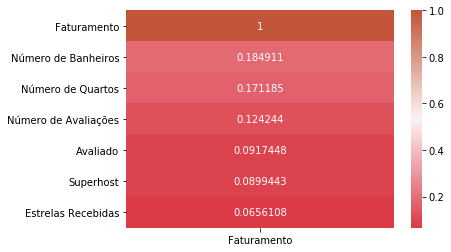

In [26]:
df = pd.DataFrame(matriz_correlacao['Faturamento'],
              index=matriz_correlacao.index)

sns.heatmap(df, annot=True, fmt="g", cmap= sns.diverging_palette(10, 20, n=200))



plt.show()

Não há variáveis altamente correlacionadas com o faturamento. As variáveis com maior correlação com o faturamento são: número de banheiros e números de quartos, respectivamente. Isso pode ter relação com o fato de imóveis maiores terem diárias mais caras. A terceira característica com maior correlação com o faturamento é o número de avaliações, o que pode ser um sinal positivo para quem busca um imóvel para aluguel, elevando as chances de uma nova reserva.

### 4. Calculando antecedência média da reserva

Para calcular a antecedência média das reservas, a base price será utilizada
para calcular a diferença em dias da data da reserva até a primeira diária.
As duas variáveis possuem formatos diferentes de data. Uma inclui horário e 
a outra não.

In [27]:
#Verifica se a variável booked_on tem variação de horário 

dataset_price = pd.read_csv(price)

dataset_price = dataset_price.loc[dataset_price['occupied'] == 1]

dataset_price.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1


Como verificamos que não há varição de horário, padronizou-se para o formato dd/mm/aaaa.

In [28]:
#Padroniza formato de data

import datetime
from datetime import timedelta

dataset_price['date'] = pd.to_datetime(dataset_price['date'], 
                                       format='%Y-%m-%d')

dataset_price['booked_on'] = pd.to_datetime(dataset_price['booked_on'], 
                                            format='%Y-%m-%d')

#cria variável de intervalo de dias

dataset_price['intervalo'] = (dataset_price['date'] - dataset_price['booked_on']).dt.days

#cria variável com o dia da semana 

dataset_price['dia_da_semana'] = dataset_price['date'].dt.day_name() 

#filtra apenas para os dias ocupados

dataset_price = dataset_price[(dataset_price.occupied == 1)]

In [29]:
#Remove as colunas desnecessárias

to_drop = ['Unnamed: 0', 
            'Unnamed: 0.1',
            'price_string',
            'occupied']

dataset_price.drop(to_drop, 
                   inplace=True,
                   axis=1)

#dataset_price.head()


A partir daqui, criaremos duas dataframes que serão unidas posteriomente para calcular a antecedência média da reserva no caso geral e nas reservas
de fim de semana



In [30]:
#Agrega por reserva

#Primeira df 

df = dataset_price.groupby(['airbnb_listing_id', 'booked_on']).min() #utilizando min para considerar o primeiro dia da reserva

to_drop = ['date'] # elimina coluna desnecessária

df.drop(to_drop, 
        inplace=True, 
        axis=1)

df.rename(columns = {                          #renomeia colunas
    'intervalo': 'intervalo_min', 
    'dia_da_semana': 'dia_da_entrada'
    } , 
          inplace = True)

In [31]:
#Segunda df

df2 = dataset_price.groupby(
    ['airbnb_listing_id', 'booked_on']
    ).max() #utilizando max para considerar o último dia da reserva

to_drop = ['date']  # elimina coluna desnecessária

df2.drop(to_drop,
         inplace=True, 
         axis=1)

df2.rename(columns = {                #renomeia colunas
    'intervalo': 'intervalo_max',
    'dia_da_semana':'dia_da_saida'
    } , 
           inplace = True)

In [32]:
#Cria a dataframe que será usada nos cálculos

df3 = pd.merge(
    df, df2, on=[
        'airbnb_listing_id', 'booked_on'
    ])


A partir daqui serão criadas variáveis necessárias aos cálculos


In [33]:
#Cria a variável 'dias_hospedado', correspondente à duração da hospedagem

df3['dias_hospedado'] = df3['intervalo_max'] - df3['intervalo_min'] + 1

# Essa variável foi criada para conseguirmos diferenciar reservas de fim de semana

In [34]:
#Cria a variável 'fds', assinalando se a reserva é apenas para o fim de semana

df3['fds'] = np.where(
    (((df3['dia_da_entrada'] == 'Friday') | (
        df3['dia_da_entrada'] == 'Saturday') | (
        df3['dia_da_entrada'] == 'Sunday')) & (
        (df3['dia_da_saida'] == 'Saturday') | (
            df3['dia_da_saida'] == 'Sunday') | (
            df3['dia_da_saida'] == 'Monday')) &  (
        df3['dias_hospedado'] < 5)), 1, 0 )



In [35]:
#calcula a média de antecedência da reserva

antecedencia_media = df3['intervalo_min'].mean()

#print(antecedencia_media)



A antecedência média das reservas é de 15.5 dias

In [36]:
#Agora checaremos se a média se altera caso sejam considerados apenas os finais de semana
#Filtra para fim de semana

fim_de_semana = df3[(df3.fds == 1)]

#fim_de_semana.head()

In [37]:
#calcula a média de antecedência da reserva

antecedencia_media_fds = fim_de_semana['intervalo_min'].mean()

#print(antecedencia_media_fds)



Considerando apenas as reservas de fim de semana, a média cai para 8.55 dias de antecedência.

In [38]:
#Após a análise dos dados, criaremos um relatório em PDF

# Importa bibliotecas

from IPython.display import Javascript
from nbconvert import HTMLExporter
import codecs
import nbformat

#Salva o notebook

def save_notebook():
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )

In [39]:
#Converte o notebook em HTML excluindo as celulas de código

def output_HTML(read_file, output_file):

    exporter = HTMLExporter()
    # read_file é '.ipynb', output_file é '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)
    
    with open(output_file, 'r') as html_file:
        content = html_file.read()

    # Remove os códigos
    content = content.replace("div.input_area {","div.input_area {\n\tdisplay: none;")    
    content = content.replace(".prompt {",".prompt {\n\tdisplay: none;")

    f = open(output_file, 'w')
    f.write(content)
    f.close()

In [40]:
# Salva nos dois formatos

import time

save_notebook()
time.sleep(10)
current_file = 'Seazone Code Challenge.ipynb'
output_file = 'Seazone Code Challenge.html'

In [41]:
output_HTML(current_file, output_file)